In [138]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [139]:
df = pd.read_csv('data_points.csv')

df.head()



C:\Users\Ukeme\AppData\Local\Temp\ipykernel_24304\898743481.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data_points.csv')


,Datetime,kwh,building_type,air_temp,dew_temp,square_feet,year_built
0,31/12/2002 01:00,26.498,Education,25.0,20.0,8006,2008
1,31/12/2002 02:00,25.147,Education,24.4,21.1,2720,2004
2,31/12/2002 03:00,24.574,Education,22.8,21.1,5376,1991
3,31/12/2002 04:00,24.393,Education,21.1,20.6,23685,2002
4,31/12/2002 05:00,24.860,Education,20.0,20.0,116607,1975


DATA QUALITY CHECKS

In [140]:
df.head().describe()

print(df.isna().sum(),"\n")
#print(df.describe(),"\n")

missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage)

Datetime         0
kwh              0
building_type    0
air_temp         0
dew_temp         0
square_feet      0
year_built       0
dtype: int64 

Datetime         0.0
kwh              0.0
building_type    0.0
air_temp         0.0
dew_temp         0.0
square_feet      0.0
year_built       0.0
dtype: float64


FEATURE ENGINEERING

In [141]:
df['Datetime'] = pd.to_datetime(df['Datetime'])

# Extract features from 'Timestamp' column
df['year'] = df['Datetime'].dt.year
df['date'] = df['Datetime'].dt.date
df['month'] = df['Datetime'].dt.month
df['day'] = df['Datetime'].dt.day
df['hour'] = df['Datetime'].dt.hour
df['time'] = df['Datetime'].dt.time
df['week'] = df['Datetime'].dt.week


df.head(10)

C:\Users\Ukeme\AppData\Local\Temp\ipykernel_24304\3241122974.py:10: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['week'] = df['Datetime'].dt.week


,Datetime,kwh,building_type,air_temp,dew_temp,square_feet,year_built,year,date,month,day,hour,time,week
0,2002-12-31 01:00:00,26.498,Education,25.0,20.0,8006,2008,2002,2002-12-31,12,31,1,01:00:00,1
1,2002-12-31 02:00:00,25.147,Education,24.4,21.1,2720,2004,2002,2002-12-31,12,31,2,02:00:00,1
2,2002-12-31 03:00:00,24.574,Education,22.8,21.1,5376,1991,2002,2002-12-31,12,31,3,03:00:00,1
3,2002-12-31 04:00:00,24.393,Education,21.1,20.6,23685,2002,2002,2002-12-31,12,31,4,04:00:00,1
4,2002-12-31 05:00:00,24.860,Education,20.0,20.0,116607,1975,2002,2002-12-31,12,31,5,05:00:00,1
5,2002-12-31 06:00:00,26.222,Education,19.4,19.4,8000,2000,2002,2002-12-31,12,31,6,06:00:00,1
6,2002-12-31 07:00:00,28.702,Lodging/residential,21.1,21.1,27926,1981,2002,2002-12-31,12,31,7,07:00:00,1
7,2002-12-31 08:00:00,30.698,Education,21.1,21.1,121074,1989,2002,2002-12-31,12,31,8,08:00:00,1
8,2002-12-31 09:00:00,31.800,Education,20.6,20.0,60809,2003,2002,2002-12-31,12,31,9,09:00:00,1
9,2002-12-31 10:00:00,32.359,Office,21.1,20.6,27000,2010,2002,2002-12-31,12,31,10,10:00:00,1


TEST FOR OUTLIER

In [142]:
z_scores = np.abs(stats.zscore(df['kwh']))
outliers = df[z_scores > 3]

df.shape

z_scores

0         0.863588
1         1.072592
2         1.161237
3         1.189238
4         1.116992
            ...   
145361    1.887964
145362    1.805507
145363    1.596812
145364    1.250586
145365    1.009868
Name: kwh, Length: 145366, dtype: float64

CHECK UNIQUE MONTH AND YEAR

In [143]:

print(df.year.unique(),"\n")
print(df.month.unique(),"\n")
print("The Total Numbe of Unique year",df.year.unique(),"\n")
print("The Total Numbe of Unique month",df.month.unique(),"\n")

[2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015
 2016 2017 2018] 

[12  1 11 10  9  8  7  6  5  4  3  2] 

The Total Numbe of Unique year [2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015
 2016 2017 2018] 

The Total Numbe of Unique month [12  1 11 10  9  8  7  6  5  4  3  2] 



EXPLORATORY DATA ANALYSIS

<Axes: xlabel='hour', ylabel='kwh'>

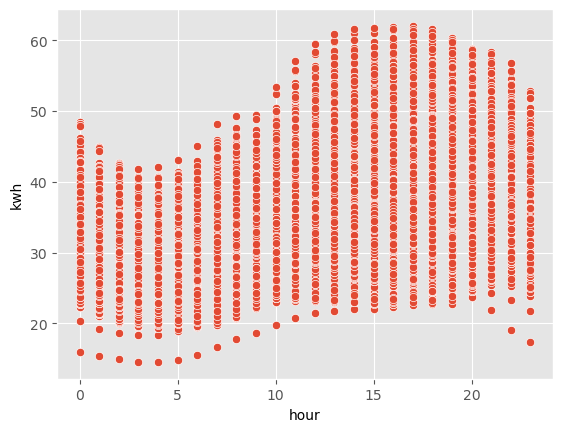

In [144]:
sns.scatterplot(data=df,x='hour',y='kwh')

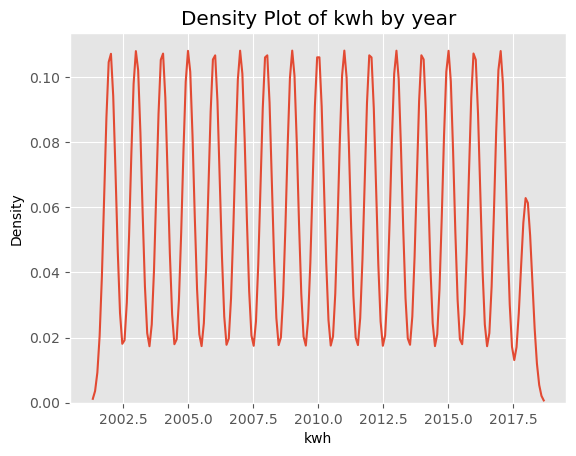

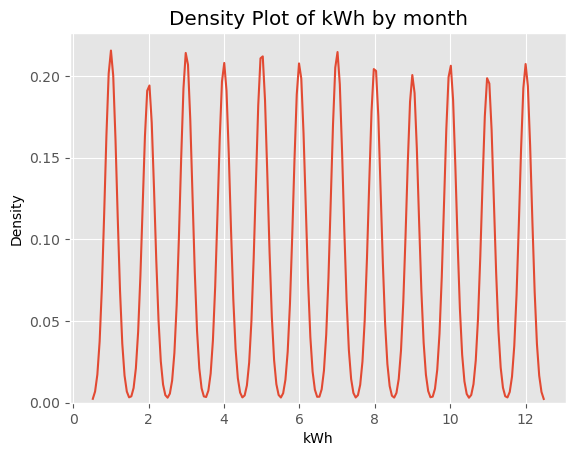

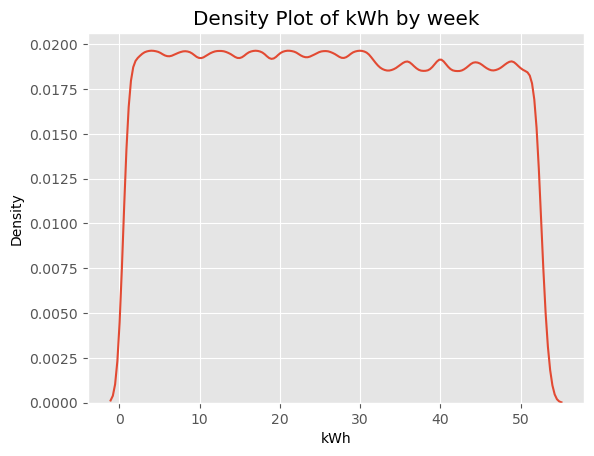

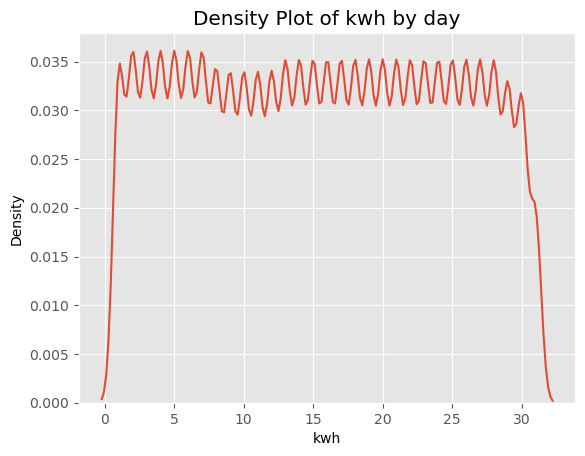

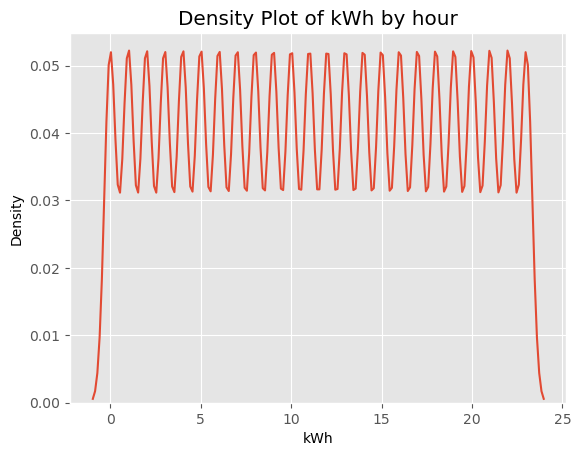

In [145]:

sns.kdeplot(df['year'], bw_adjust=0.5)
plt.title('Density Plot of kwh by year')
plt.xlabel('kwh')
plt.show()

#DataFrame and focusing on the 'kwh' column for density plot visualization
sns.kdeplot(df['month'], bw_adjust=0.5)
plt.title('Density Plot of kWh by month')
plt.xlabel('kWh')
plt.show()


#  focusing on the 'kwh' column for density plot visualization
sns.kdeplot(df['week'], bw_adjust=0.5)
plt.title('Density Plot of kWh by week')
plt.xlabel('kWh')
plt.show()



sns.kdeplot(df['day'], bw_adjust=0.5)
plt.title('Density Plot of kwh by day')
plt.xlabel('kwh')
plt.show()

#  DataFrame and focusing on the 'kwh' column for density plot visualization
sns.kdeplot(df['hour'], bw_adjust=0.5)
plt.title('Density Plot of kWh by hour')
plt.xlabel('kWh')
plt.show()


ENERGY CONSUMPTION BASED ON YEAR

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


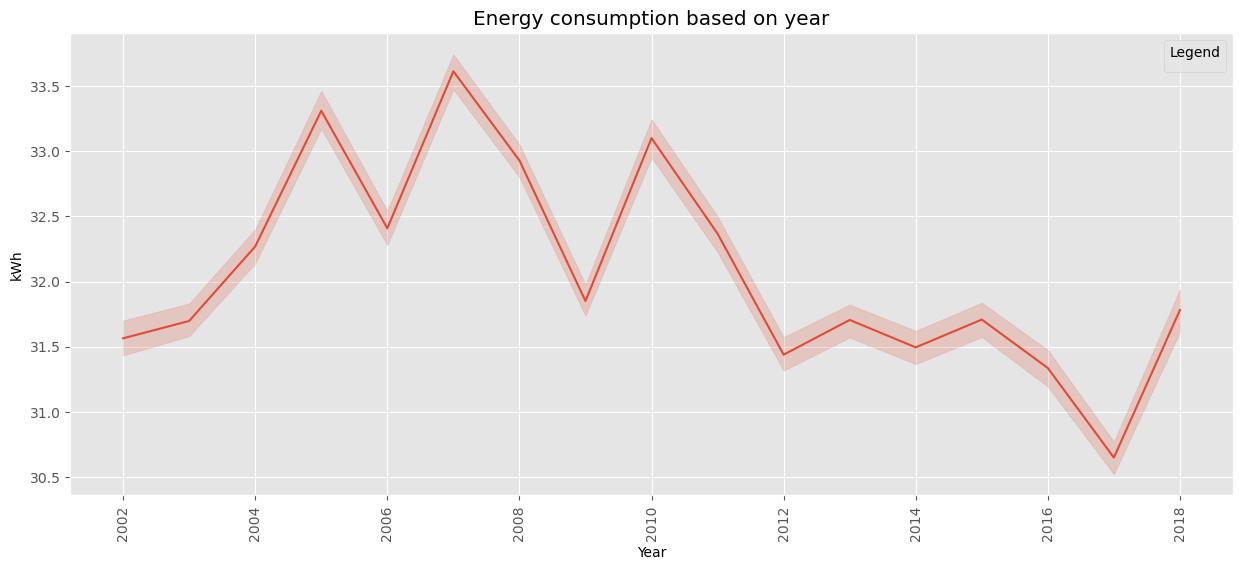

In [146]:
# 'df' is a pre-defined DataFrame with 'year' and 'kwh' columns

# Setting the aesthetic style of the plots
style.use('ggplot')

# Create the figure and a subplot
fig, ax1 = plt.subplots(figsize=(15, 6))  # Set the size of the figure

# Creating a lineplot
sns.lineplot(x='year', y='kwh', data=df, ax=ax1)

# Adding legend, title, and labels
plt.legend(title='Legend')
plt.title("Energy consumption based on year")
plt.xlabel('Year')
plt.ylabel('kWh')

# Rotating x-axis labels for better readability
for label in ax1.get_xticklabels():
    label.set_rotation(90)

# Adding grid
plt.grid(True)

# Display the plot
plt.show()


In [147]:
df.head()

,Datetime,kwh,building_type,air_temp,dew_temp,square_feet,year_built,year,date,month,day,hour,time,week
0,2002-12-31 01:00:00,26.498,Education,25.0,20.0,8006,2008,2002,2002-12-31,12,31,1,01:00:00,1
1,2002-12-31 02:00:00,25.147,Education,24.4,21.1,2720,2004,2002,2002-12-31,12,31,2,02:00:00,1
2,2002-12-31 03:00:00,24.574,Education,22.8,21.1,5376,1991,2002,2002-12-31,12,31,3,03:00:00,1
3,2002-12-31 04:00:00,24.393,Education,21.1,20.6,23685,2002,2002,2002-12-31,12,31,4,04:00:00,1
4,2002-12-31 05:00:00,24.860,Education,20.0,20.0,116607,1975,2002,2002-12-31,12,31,5,05:00:00,1


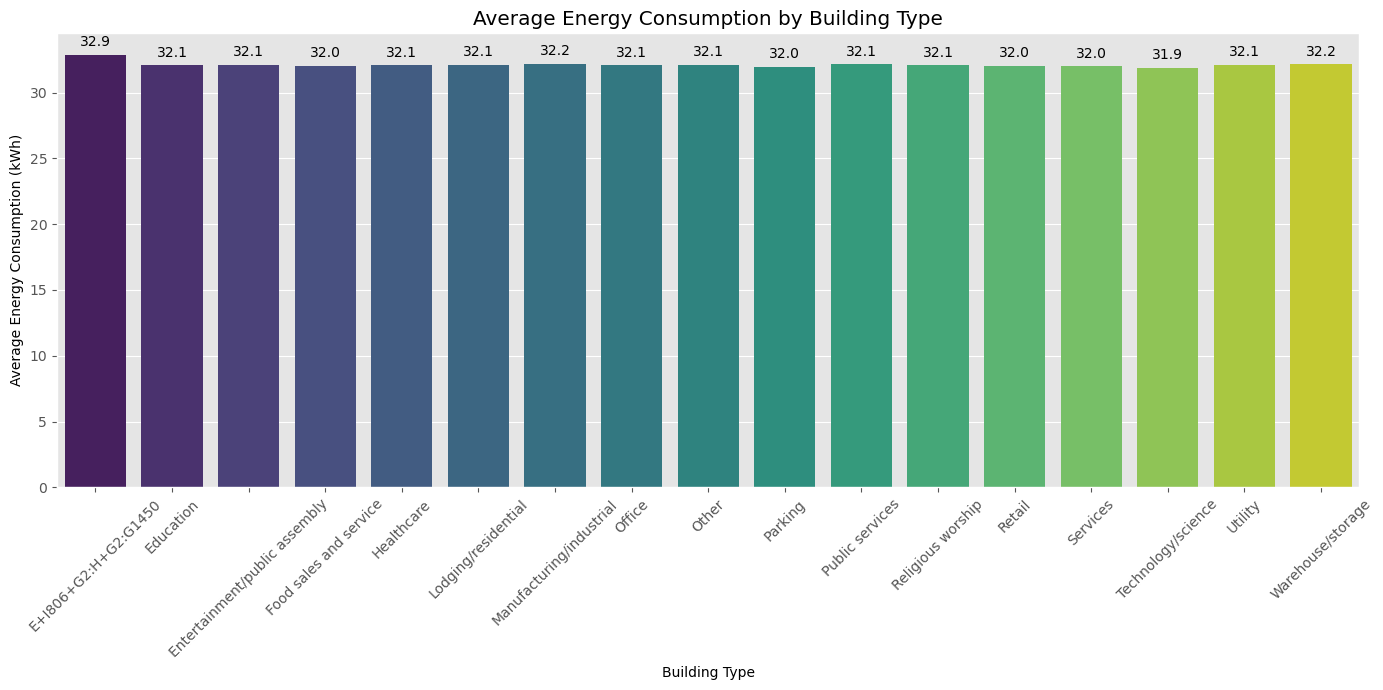

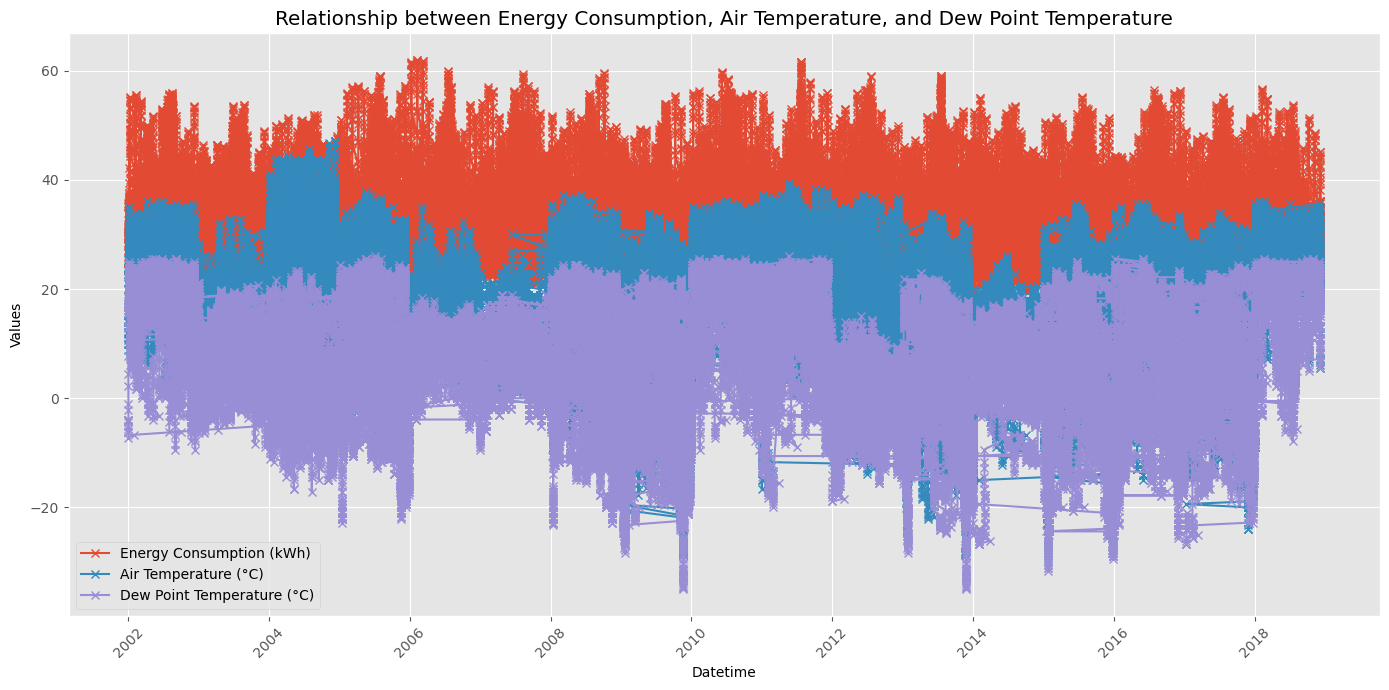

In [148]:
#  'df' is the  DataFrame containing the data
#  calculate the average energy consumption for each building type
average_consumption = df.groupby('building_type')['kwh'].mean().reset_index()

# we plot the bar chart
plt.figure(figsize=(14, 7))  # potentially better fit for labels
barplot = sns.barplot(data=average_consumption, x='building_type', y='kwh', palette='viridis')

# Add labels to each bar
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.1f'),  # Format the label
                     (p.get_x() + p.get_width() / 2., p.get_height()),  # Position
                     ha = 'center',  # Center the labels horizontally
                     va = 'center',  # Center the labels vertically
                     xytext = (0, 9),  # Distance text is offset from point (x,y)
                     textcoords = 'offset points')

plt.title('Average Energy Consumption by Building Type')
plt.xlabel('Building Type')
plt.ylabel('Average Energy Consumption (kWh)')
plt.xticks(rotation=45)  # Rotating x labels for better readability
plt.tight_layout()
plt.show()




# Plotting a line graph to show the relationships
plt.figure(figsize=(14, 7))
plt.plot(df['Datetime'], df['kwh'], label='Energy Consumption (kWh)', marker='x')
plt.plot(df['Datetime'], df['air_temp'], label='Air Temperature (°C)', marker='x')
plt.plot(df['Datetime'], df['dew_temp'], label='Dew Point Temperature (°C)', marker='x')

# Formatting the plot
plt.title('Relationship between Energy Consumption, Air Temperature, and Dew Point Temperature')
plt.xlabel('Datetime')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout() 
# Show the plot
plt.show()


Creating a line plot to visualize kwh usage by hour

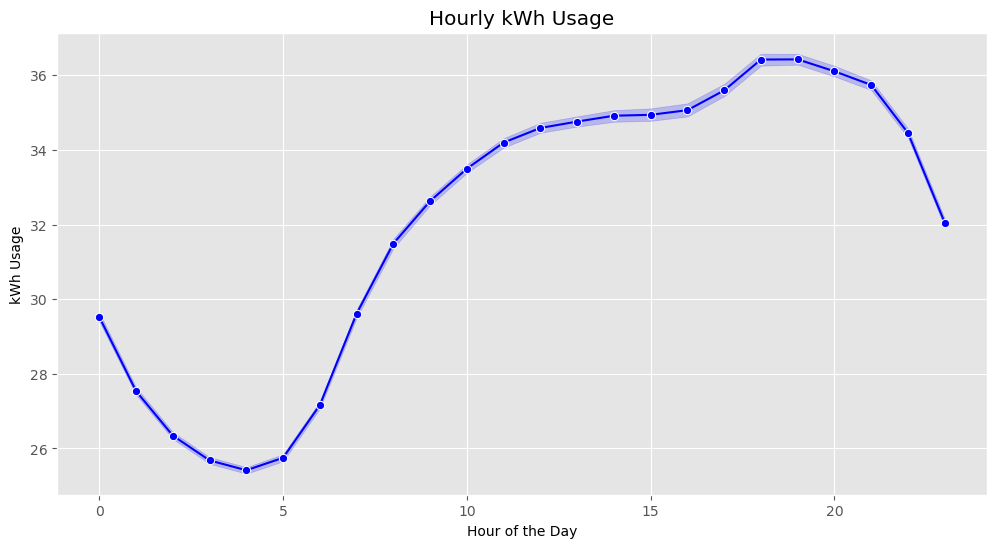

In [149]:
# Creating a line plot to visualize kWh usage by hour
plt.figure(figsize=(12, 6))
sns.lineplot(x='hour', y='kwh', data=df, marker='o',c='b')
plt.title('Hourly kWh Usage')
plt.xlabel('Hour of the Day')
plt.ylabel('kWh Usage')
plt.grid(True)
plt.show()


CORRELATION TEST

C:\Users\Ukeme\AppData\Local\Temp\ipykernel_24304\728288094.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


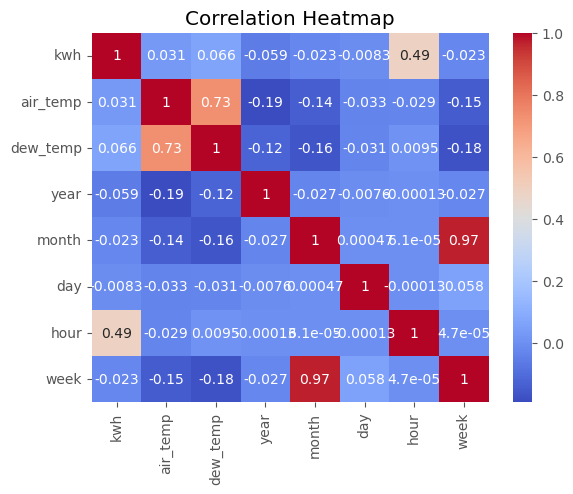

In [150]:

corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

RESAMPLING OF THE DATA TO MAKE ROOM FOR TRAINING AND TESTING

In [151]:
# 'date_column' is the name of the column with datetime information
df['Datetime'] = pd.to_datetime(df['Datetime'])  # Convert to datetime
df.set_index('Datetime', inplace=True)  # Set the datetime column as the index

#newdata = data.resample('D').mean()  #  resampling by day and compute the mean


In [152]:
newdata = df.resample('D').mean()

C:\Users\Ukeme\AppData\Local\Temp\ipykernel_24304\1027224061.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  newdata = df.resample('D').mean()


In [153]:
newdata.shape

(6185, 8)

In [154]:

print("Old Dataset ",df.shape )
print("New  Dataset ",newdata.shape )

Old Dataset  (145366, 13)
New  Dataset  (6185, 8)


In [155]:
#filling NaN values with the mean of each column as an example
for column in newdata.columns:
    newdata[column].fillna(newdata[column].mean(), inplace=True)
    
newdata.shape    

(6185, 8)

In [156]:

# Firstly Reserve the last 100 entries for testing
TestData = newdata.tail(100)

# secondly Include all features in the training set, not just the first column
Training_Set = newdata.iloc[:,:-60]

#  include all features up to the last 60 rows (for all columns):
Training_Set_All_Features = newdata.iloc[:-60, :]

#  This keeps all columns but excludes the last 60 rows, use these rows as part of a validation set or for some other purpose.

print("Training Set Shape ", Training_Set.shape)
print("Test Set Shape ", TestData.shape)

Training Set Shape  (6185, 0)
Test Set Shape  (100, 8)


RESERVE THE LAST 100 ENTRIES FOR TESTING
INCLUDE ALL FEATURES IN THE TRAINING SET, EXCLUDING THE LAST 60 ROWS

In [157]:
Training_Set_All_Features = newdata.iloc[:-60, :]

# Step 1: Reserve the last 100 entries for testing
TestData = newdata.tail(100)

# Step 2: Include all features in the training set, excluding the last 60 rows
Training_Set = newdata.iloc[:-60, :]


print("Training Set Shape ", Training_Set.shape)
print("Test Set Shape ", TestData.shape)

Training Set Shape  (6125, 8)
Test Set Shape  (100, 8)


NORMALIZATION BY SCALING

In [158]:
# Convert DataFrame to numpy array
Training_Set = Training_Set.values

# Initialize the MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))

# Fit the scaler to the training data and transform it
Train = sc.fit_transform(Training_Set)


In [159]:
#  Training_Set is DataFrame with shape (6125, 10) before normalization
# Normalize the training set
sc = MinMaxScaler(feature_range=(0, 1))
Train = sc.fit_transform(Training_Set)

X_Train = []
Y_Train = []

# to predict the first feature in the future. Adjust the index for Y_Train 
for i in range(60, Train.shape[0]):
    X_Train.append(Train[i-60:i])
    Y_Train.append(Train[i, 0]) # first column is what  prediction is perform

# Convert into Numpy Array
X_Train, Y_Train = np.array(X_Train), np.array(Y_Train)

# Reshaping for model compatibility
# For example, input_shape=(60, 10) for LSTM layers in Keras
# X_Train = np.reshape(X_Train, (X_Train.shape[0], X_Train.shape[1], 10))

print("X_Train shape:", X_Train.shape)
print("Y_Train shape:", Y_Train.shape)


X_Train shape: (6065, 60, 8)
Y_Train shape: (6065,)


Adding  LSTM layers and  regularization

In [160]:
# Initialize the model
regressor = Sequential()

# Adding the 1st LSTM layer and some Dropout regularization
# Ensure X_Train.shape[1] is the number of time steps (60) and X_Train.shape[2] is the number of features per step (10)
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(60, 8)))  # Correct input_shape to (60, 10)
regressor.add(Dropout(0.2))

# adding more layers as planned
# Adding the 2nd LSTM layer and some Dropout regularization
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

# Adding the 3rd LSTM layer and some Dropout regularization
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

# Adding the 4th LSTM layer and some Dropout regularization
# The final LSTM layer typically does not return sequences (return_sequences=False) unless you have another recurrent layer following it
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units=1))

# Compiling the model
regressor.compile(optimizer='adam', loss='mean_squared_error')


In [161]:
#  Remove rows with NaN values in X_Train
X_Train = np.array([x for x in X_Train if not np.any(np.isnan(x))])

#  remove rows from X_Train, make sure to remove corresponding entries in Y_Train

# Remove NaN values in Y_Train
Y_Train = Y_Train[~np.isnan(Y_Train)]


# For X_Train
X_Train = np.where(np.isfinite(X_Train), X_Train, np.nan)

# For Y_Train
Y_Train = np.where(np.isfinite(Y_Train), Y_Train, np.nan)


In [162]:
print(np.any(np.isnan(X_Train)))
print(np.any(np.isnan(Y_Train)))
print(np.all(np.isfinite(X_Train)))
print(np.all(np.isfinite(Y_Train)))

False
False
True
True


DATA QUALITY CHECKS BEFORE COMPILATION

In [163]:
# Check for NaN or Infinite values in X_Train and compile indices
problematic_indices_x = np.where(np.any(np.isnan(X_Train) | np.isinf(X_Train), axis=(1, 2)))[0]

# Check for NaN or Infinite values in Y_Train and compile indices
problematic_indices_y = np.where(np.isnan(Y_Train) | np.isinf(Y_Train))[0]

# Combine and deduplicate indices from both sets
problematic_indices = np.unique(np.concatenate((problematic_indices_x, problematic_indices_y)))



# Remove the identified problematic indices from X_Train
X_Train_cleaned = np.delete(X_Train, problematic_indices, axis=0)

# Remove the identified problematic indices from Y_Train
Y_Train_cleaned = np.delete(Y_Train, problematic_indices)



print("X_Train_cleaned shape:", X_Train_cleaned.shape)
print("Y_Train_cleaned shape:", Y_Train_cleaned.shape)



X_Train_cleaned shape: (6065, 60, 8)
Y_Train_cleaned shape: (6065,)


FITTING DATA FOR BATCH TRAINING WITH 100 EPOCHS

In [164]:
history = regressor.fit(X_Train_cleaned, Y_Train_cleaned, epochs=120, batch_size=32)


Epoch 1/120
190/190 [==============================] - 17s 56ms/step - loss: 0.0245
Epoch 2/120
190/190 [==============================] - 11s 60ms/step - loss: 0.0206
Epoch 3/120
190/190 [==============================] - 12s 61ms/step - loss: 0.0196
Epoch 4/120
190/190 [==============================] - 13s 67ms/step - loss: 0.0192
Epoch 5/120
190/190 [==============================] - 13s 69ms/step - loss: 0.0177
Epoch 6/120
190/190 [==============================] - 13s 71ms/step - loss: 0.0167
Epoch 7/120
190/190 [==============================] - 14s 76ms/step - loss: 0.0161
Epoch 8/120
190/190 [==============================] - 14s 73ms/step - loss: 0.0158
Epoch 9/120
190/190 [==============================] - 14s 72ms/step - loss: 0.0154
Epoch 10/120
190/190 [==============================] - 14s 74ms/step - loss: 0.0153
Epoch 11/120
190/190 [==============================] - 15s 78ms/step - loss: 0.0154
Epoch 12/120
190/190 [==============================] - 16s 84ms/step - lo

SAVING TRAINED MODEL

In [165]:
regressor.save('your_model.h5')  # Saves the model to a file



C:\Users\Ukeme\anaconda3\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [166]:

regressor.save('your_model.keras')


In [167]:
TestData.head

<bound method NDFrame.head of                   kwh   air_temp   dew_temp         year      month  \
Datetime                                                              
2018-08-30  32.080027  14.740057   7.703319  2009.801948   6.467734   
2018-08-31  32.080027  14.740057   7.703319  2009.801948   6.467734   
2018-09-01  35.337375  26.666667  23.616667  2018.000000   9.000000   
2018-09-02  35.460125  27.495833  22.529167  2018.000000   9.000000   
2018-09-03  32.586833  28.641667  21.366667  2018.000000   9.000000   
...               ...        ...        ...          ...        ...   
2018-12-03  32.489167  28.287500  23.212500  2018.000000  12.000000   
2018-12-04  27.810958  25.487500  16.929167  2018.000000  12.000000   
2018-12-05  25.662083  23.425000  17.929167  2018.000000  12.000000   
2018-12-06  27.915083  23.658333  16.566667  2018.000000  12.000000   
2018-12-07  36.770458  13.425000   9.750000  2018.000000  12.000000   

                  day       hour       week  


 COMBINING BOTH NEWDATA AND TEST DATA AND ADDING PREPROCESSING STEPS TO THE CONCATENATED DATAFRAME
 
  dealing with multiple features, the last dimension of X_test matches the number of features
 8 features based on newdata.head()

In [168]:
Df_Total = pd.concat((newdata[["kwh","air_temp","dew_temp","year","month","day","hour","week"]], TestData[["kwh","air_temp","dew_temp","year","month","day","hour","week"]]), axis=0)

In [169]:
# all necessary preprocessing steps are applied to Df_Total
inputs = Df_Total[len(Df_Total) - len(TestData) - 60:].values

#  `sc` is MinMaxScaler already fitted on the training data
inputs = sc.transform(inputs)



X_test = []
for i in range(60, len(inputs)):
    X_test.append(inputs[i-60:i])

# Convert into Numpy Array
X_test = np.array(X_test)

#  dealing with multiple features, the last dimension of X_test should match the number of features
# 8 features based on newdata.head()
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 8))  # Adjust the 8 if the number of features differs


MAKE PREDICTIONS 

In [170]:
predicted_values = regressor.predict(X_test)

# # If necessary, inverse the scaling of predictions

# Create a dummy array with the same shape as the input data to the scaler
dummy = np.zeros((predicted_values.shape[0], 8))  # 8 features
# Place predicted_values in the column corresponding to the target feature
dummy[:, 0] = predicted_values.ravel()  #  the first column is the target feature
# Apply inverse transformation
dummy = sc.inverse_transform(dummy)
# Extract the inverse transformed predictions
predicted_values = dummy[:, 0].reshape(-1, 1)


4/4 [==============================] - 1s 20ms/step


VISUALIZE PREDICTION OUTCOME

In [171]:


# After  inverse scaling code
predicted_values = dummy[:, 0].reshape(-1, 1)

#  fixing of the NameError by replacing `predicted_stock_price` with `predicted_values`
True_KiloWatt = TestData["kwh"].to_list()
Predicted_KiloWatt = predicted_values.flatten()  # Convert to a flat list 
dates = TestData.index.to_list()




# `dates` contains the list of date indices from `TestData`
# `Predicted_KiloWatt` is a flattened list (or 1D array)
Predicted_KiloWatt = predicted_values.flatten()

# Create a DataFrame with the desired columns
Machine_Df = pd.DataFrame(data={
    "Date": dates,
    "TrueKiloWatt": True_KiloWatt,
    "PredictedKiloWatt": Predicted_KiloWatt
})




PREDICTION OUTCOME

In [185]:
Machine_Df.tail(50)

,Date,TrueKiloWatt,PredictedKiloWatt
50,2018-10-19,32.080027,32.701199
51,2018-10-20,32.080027,33.071573
52,2018-10-21,32.080027,33.195949
53,2018-10-22,32.080027,32.994098
54,2018-10-23,32.080027,32.547128
55,2018-10-24,32.080027,31.992330
56,2018-10-25,32.080027,31.583515
57,2018-10-26,32.080027,31.578189
58,2018-10-27,32.080027,31.940213
59,2018-10-28,32.080027,32.251381


PREDICTION RESULT VISUALIZATION

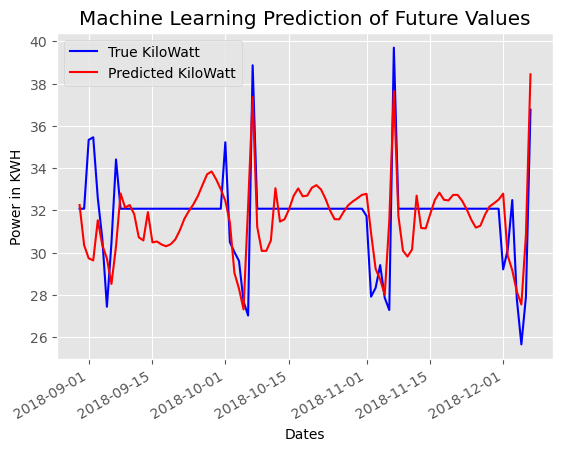

In [178]:


# Data setup
Machine_Df = pd.DataFrame(data={
    "Date": dates,
    "TrueKiloWatt": True_KiloWatt,
    "PredictedKiloWatt": Predicted_KiloWatt
})

# Creating a plot using the standard format
fig = plt.figure()

# Addng a single subplot (111) to the figure
ax1 = fig.add_subplot(111)

# true values in blue and predicted values in red
ax1.plot(dates, True_KiloWatt, color="blue", label="True KiloWatt")
ax1.plot(dates, Predicted_KiloWatt, color="red", label="Predicted KiloWatt")

#  auto-rotate x-axis to the labels for better readability
plt.gcf().autofmt_xdate()

# Labeling and title
plt.xlabel("Dates")
plt.ylabel("Power in KWH")
plt.title("Machine Learning Prediction of Future Values")

# Adding a legend with a proper label
plt.legend(loc="best")

#plot
plt.show()


MEASURE PERFORMANCE

In [181]:
# # the actual_values and predicted_values are defined
# mse = mean_squared_error(actual_values, predicted_values)
# rmse = np.sqrt(mse)
# mae = mean_absolute_error(actual_values, predicted_values)


# print("Mean Absolute Error (MAE):", mae)
# print("Mean Squared Error (MSE):", mse)
# print("Root Mean Squared Error (RMSE):", rmse)





# Calculate the errors
mse = mean_squared_error(actual_values, predicted_values)
rmse = np.sqrt(mse)
mae = mean_absolute_error(actual_values, predicted_values)


# Print the errors
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)




Mean Absolute Error (MAE): 1.1918111909603208
Mean Squared Error (MSE): 2.78647754783195
Root Mean Squared Error (RMSE): 1.669274557354766


VISUALIZE PERFORMANCE METRICS

Mean Absolute Error (MAE): 1.1918111909603208
Mean Squared Error (MSE): 2.78647754783195
Root Mean Squared Error (RMSE): 1.669274557354766


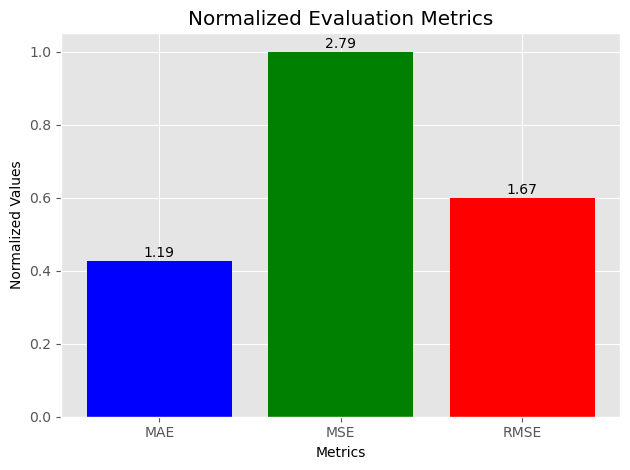

In [180]:
# the actual_values and predicted_values are defined
mse = mean_squared_error(actual_values, predicted_values)
rmse = np.sqrt(mse)
mae = mean_absolute_error(actual_values, predicted_values)


print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)


#  normalize metrics to ensure they fit on the same scale
# especially if one metric is substantially larger than the others
metrics = np.array([mae, mse, rmse])
normalized_metrics = metrics / np.max(metrics)

# Plotting the metrics
fig, ax = plt.subplots()
metrics_labels = ['MAE', 'MSE', 'RMSE']
ax.bar(metrics_labels, normalized_metrics, color=['blue', 'green', 'red', 'purple'])

# Add the actual metric values above the bars
for i, v in enumerate(metrics):
    ax.text(i, normalized_metrics[i] + 0.01, f"{v:.2f}", ha='center')

# Set the title and labels
plt.title('Normalized Evaluation Metrics')
plt.xlabel('Metrics')
plt.ylabel('Normalized Values')

# Show the plot
plt.tight_layout()
plt.show()


THE END!